<a href="https://colab.research.google.com/github/zcoronado/global-warming-analytics/blob/main/FbProphet_Seas_lvl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import files
uploaded = files.upload()

Saving San_Diego_Ca.csv to San_Diego_Ca (1).csv


In [87]:
# import numpy, pandas for data manipulation
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt

In [89]:
weather_data = pd.read_csv('San_Diego_Ca.csv',parse_dates=['date'])
weather_data

,Station_ID,date,Monthly_MSL,Monthly_Avg_Temp
0,"San Diego, CA",1979-01-01,-0.002,56.8
1,"San Diego, CA",1979-02-01,-0.040,56.9
2,"San Diego, CA",1979-03-01,-0.039,60.1
3,"San Diego, CA",1979-04-01,-0.040,63.4
4,"San Diego, CA",1979-05-01,-0.047,65.5
...,...,...,...,...
505,"San Diego, CA",2021-02-01,0.028,58.9
506,"San Diego, CA",2021-03-01,0.026,58.9
507,"San Diego, CA",2021-04-01,0.092,63.7
508,"San Diego, CA",2021-05-01,0.102,64.8


In [90]:
# Check Dataset shape
print(weather_data.shape)

# select the data and temperature columns
sea_lvl_df = weather_data[['date', 'Monthly_MSL']]

# rename column
sea_lvl_df = sea_lvl_df.rename(columns={'date':'ds','Monthly_MSL':'y'})

sea_lvl_df.head(10)

(510, 4)


,ds,y
0,1979-01-01,-0.002
1,1979-02-01,-0.040
2,1979-03-01,-0.039
3,1979-04-01,-0.040
4,1979-05-01,-0.047
5,1979-06-01,-0.055
6,1979-07-01,-0.071
7,1979-08-01,-0.046
8,1979-09-01,-0.042
9,1979-10-01,-0.068


In [91]:
sea_lvl_df['ds'] = pd.to_datetime(sea_lvl_df['ds'])
sea_lvl_df

,ds,y
0,1979-01-01,-0.002
1,1979-02-01,-0.040
2,1979-03-01,-0.039
3,1979-04-01,-0.040
4,1979-05-01,-0.047
...,...,...
505,2021-02-01,0.028
506,2021-03-01,0.026
507,2021-04-01,0.092
508,2021-05-01,0.102


In [92]:
# select the subset datea from 2015 - 2019
# mask = (temp_df['ds'] >= '2018-01-01') & (temp_df['ds'] <= '2021-05-04')
# temp_df = temp_df.loc[mask]

# iunpect first 5 rows and loast 5 rows of the data
from IPython.display import display
display(sea_lvl_df.head(5))
display(sea_lvl_df.tail(5))

,ds,y
0,1979-01-01,-0.002
1,1979-02-01,-0.040
2,1979-03-01,-0.039
3,1979-04-01,-0.040
4,1979-05-01,-0.047


,ds,y
505,2021-02-01,0.028
506,2021-03-01,0.026
507,2021-04-01,0.092
508,2021-05-01,0.102
509,2021-06-01,0.115


In [93]:
# describe
sea_lvl_df.describe()

,y
count,510.000000
mean,0.018902
std,0.059320
min,-0.115000
25%,-0.024750
50%,0.010000
75%,0.060500
max,0.237000


In [94]:
# Output the max and min temps
print(sea_lvl_df.loc[sea_lvl_df['y'] == sea_lvl_df['y'].max()])
print(sea_lvl_df.loc[sea_lvl_df['y'] == sea_lvl_df['y'].min()])

            ds      y
441 2015-10-01  0.237
            ds      y
118 1988-11-01 -0.115


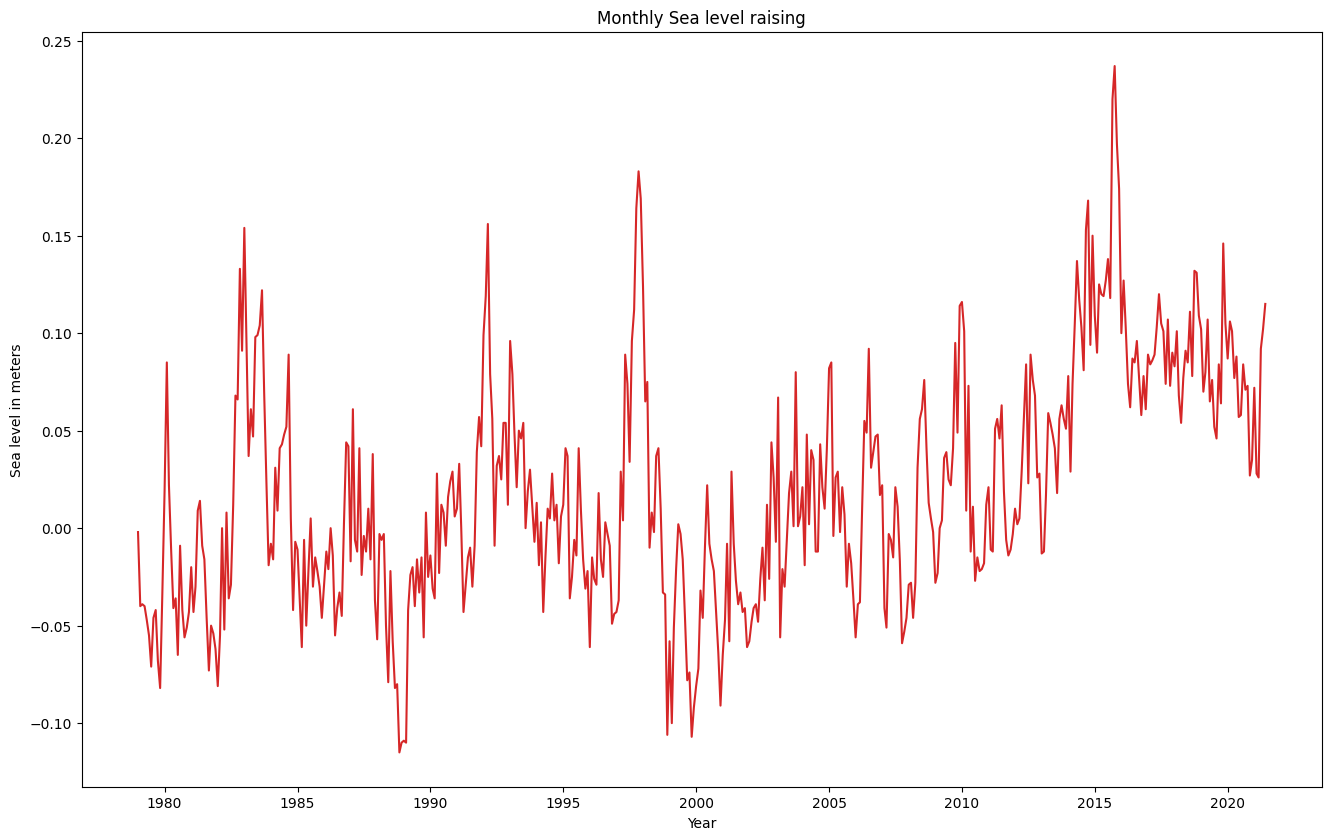

In [95]:
# plot the daily temperature change
plt.figure(figsize=(16,10), dpi=100)
plt.plot(sea_lvl_df.ds, sea_lvl_df.y, color='tab:red')
plt.gca().set(title='Monthly Sea level raising', xlabel='Year', ylabel='Sea level in meters')
plt.show()

In [96]:
# import Prophet
from fbprophet import Prophet

In [97]:
# Initialize Model
model = Prophet(seasonality_mode='multiplicative', mcmc_samples=200)
model.fit(sea_lvl_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [98]:
model.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['yearly',
  'multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [99]:
# Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=120, freq='MS')

In [100]:
future_dates.tail()

,ds
625,2031-02-01
626,2031-03-01
627,2031-04-01
628,2031-05-01
629,2031-06-01


In [101]:
prediction = model.predict(future_dates)

In [102]:
#prediction.head()

In [103]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
625,2031-02-01,0.088507,0.011261,0.166069
626,2031-03-01,0.161128,0.072314,0.249918
627,2031-04-01,0.183726,0.101372,0.263825
628,2031-05-01,0.170681,0.075854,0.266695
629,2031-06-01,0.137682,0.048466,0.235520


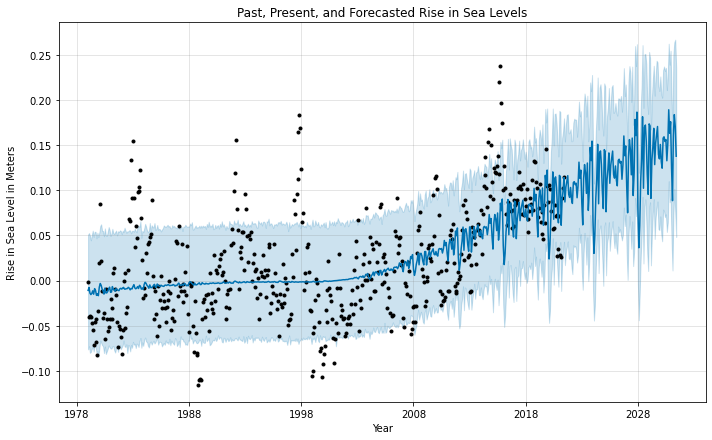

In [104]:
### plot the predicted projection
model.plot(prediction);
plt.gca().set(title='Past, Present, and Forecasted Rise in Sea Levels', xlabel='Year', ylabel='Rise in Sea Level in Meters');

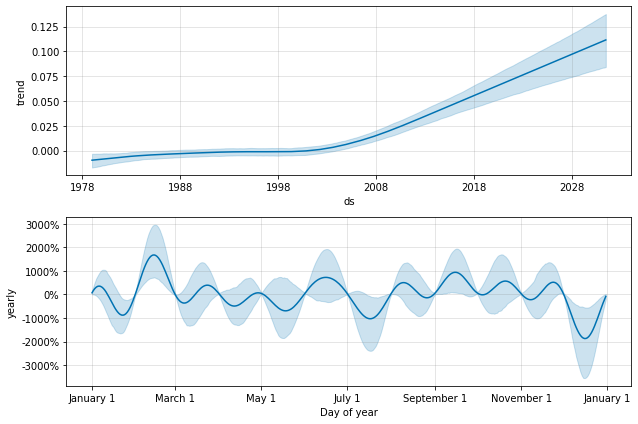

In [105]:
# plot trend, yearly seasonality of the time series. 
model.plot_components(prediction);

In [106]:
from fbprophet.plot import plot_plotly, plot_components_plotly

### plot the predicted projection - interactive

plot_plotly(model, prediction)

In [107]:
# plot trend, yearly seasonality of the time series. - interactiveb

plot_components_plotly(model, prediction)

In [108]:
from fbprophet.diagnostics import cross_validation
# Creat cross validation

cutoffs = pd.date_range(start='2018-01-01', end='2020-01-01', freq='3MS')

cross_val = cross_validation(model, horizon='90 days', cutoffs=cutoffs)
cross_val.head()

  0%|          | 0/9 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-02-01,0.082352,0.003442,0.149784,0.101,2018-01-01
1,2018-03-01,0.084869,0.015332,0.160573,0.068,2018-01-01
2,2018-04-01,0.109532,0.030238,0.182339,0.054,2018-01-01
3,2018-05-01,0.108606,0.031187,0.177863,0.077,2018-04-01
4,2018-06-01,0.103478,0.019368,0.171405,0.091,2018-04-01


In [109]:
# obtain performance metrics
from fbprophet.diagnostics import performance_metrics
p_metrics = performance_metrics(cross_val)
p_metrics.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,30 days,0.002678,0.051749,0.048807,0.712986,0.712986,1.000000
1,31 days,0.003579,0.059825,0.047417,0.490733,0.356090,0.857143
2,59 days,0.001613,0.040157,0.035548,0.462956,0.462956,1.000000
3,60 days,0.005234,0.072344,0.064824,0.697317,0.589876,0.500000
4,61 days,0.001575,0.039688,0.029001,0.285175,0.167479,1.000000


Coverage = the difference between the yhat_lower and yhat_upper


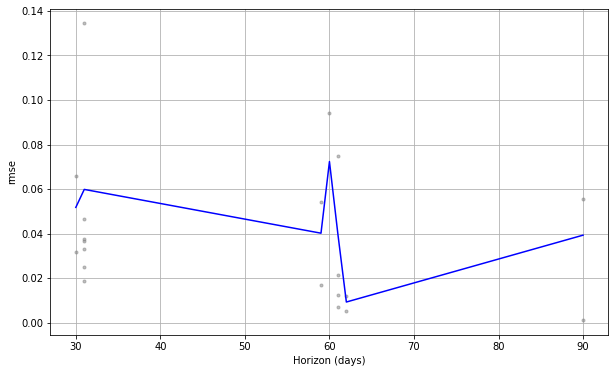

In [110]:
# plot RMSE graph

from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cross_val, metric='rmse')


In [ ]:
import json
from fbprophet.serialize import model_to_json, model_from_json

with open('sea_lvl_prophet_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)  # Save model

# with open('serialized_model.json', 'r') as fin:
#     m = model_from_json(json.load(fin))  # Load model